In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/sov11/Desktop/datasets/all_seasons.csv')
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


## Intro: Here, in this data st, I'll try to answer the question about who's been the best draft pick according to their position drafted, and who's been the worst.

 This is a controversial topic because, best/worst player is mainly about opinion and preference, and stats cannot simply justified the best/worst argument as basketball and sports in overall cannot be judged only by stats and number

it is expected that the first player drafted is the best player from the recruitment class. But sometimes, we got a highly picked player that doesn't meet the expectation or a lowly drafted player that overcome the expectation. Using this dataset, I will try to analyze which player that actually over/underacieved their draft position.

In [4]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   player_name        11145 non-null  object 
 2   team_abbreviation  11145 non-null  object 
 3   age                11145 non-null  float64
 4   player_height      11145 non-null  float64
 5   player_weight      11145 non-null  float64
 6   college            11145 non-null  object 
 7   country            11145 non-null  object 
 8   draft_year         11145 non-null  object 
 9   draft_round        11145 non-null  object 
 10  draft_number       11145 non-null  object 
 11  gp                 11145 non-null  int64  
 12  pts                11145 non-null  float64
 13  reb                11145 non-null  float64
 14  ast                11145 non-null  float64
 15  net_rating         11145 non-null  float64
 16  oreb_pct           111

In [6]:
df.info

<bound method DataFrame.info of        Unnamed: 0         player_name team_abbreviation   age  player_height  \
0               0       Dennis Rodman               CHI  36.0         198.12   
1               1   Dwayne Schintzius               LAC  28.0         215.90   
2               2        Earl Cureton               TOR  39.0         205.74   
3               3         Ed O'Bannon               DAL  24.0         203.20   
4               4         Ed Pinckney               MIA  34.0         205.74   
...           ...                 ...               ...   ...            ...   
11140       11140         Maxi Kleber               DAL  28.0         208.28   
11141       11141  Melvin Frazier Jr.               ORL  23.0         195.58   
11142       11142      Meyers Leonard               MIA  28.0         213.36   
11143       11143        Norvel Pelle               PHI  27.0         208.28   
11144       11144         Matt Thomas               TOR  25.0         193.04   

       

In [7]:
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [8]:
test_feat = ['gp', 'net_rating']
df.loc[df.player_name=='Bruce Bowen',test_feat]

,gp,net_rating
163,1,300.0
769,61,0.4
882,30,-3.9
1513,69,3.0
1892,82,3.1
2502,59,11.3
2690,82,8.9
3342,82,8.7
3763,82,9.5
4215,82,8.7


In [9]:
(df.loc[(df['gp']==1 )& (df['net_rating']>20)])

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
163,163,Bruce Bowen,MIA,26.0,200.66,90.718400,Cal State-Fullerton,USA,Undrafted,Undrafted,...,0.0,0.0,0.0,300.0,0.000,0.000,0.000,0.000,0.000,1996-97
1008,1008,Tyson Wheeler,DEN,23.0,177.80,74.842680,Rhode Island,USA,1998,2,...,4.0,0.0,2.0,62.2,0.000,0.000,0.320,1.064,0.667,1998-99
1687,1687,Mario Bennett,LAC,26.0,198.12,106.594120,Arizona State,USA,1995,1,...,0.0,2.0,0.0,32.7,0.143,0.250,0.276,0.000,0.000,1999-00
1725,1725,Randell Jackson,DAL,24.0,210.82,97.522280,Florida State,USA,1999,Undrafted,...,0.0,0.0,0.0,60.4,0.000,0.000,0.000,0.000,0.000,1999-00
1788,1788,David Wingate,SEA,37.0,195.58,84.821704,Georgetown,USA,1986,2,...,6.0,0.0,2.0,70.6,0.000,0.000,0.140,1.000,0.286,2000-01
2651,2651,Chris Owens,MEM,24.0,200.66,111.130040,Texas,USA,2002,2,...,4.0,1.0,0.0,39.1,0.333,0.000,0.288,0.667,0.000,2002-03
4226,4226,Bryon Russell,DEN,35.0,200.66,102.058200,Long Beach State,USA,1993,2,...,0.0,1.0,1.0,60.0,0.000,0.500,0.000,0.000,0.333,2005-06
4710,4710,Renaldo Major,GSW,25.0,200.66,86.182480,Fresno State,USA,Undrafted,Undrafted,...,5.0,2.0,0.0,21.5,0.000,0.091,0.171,0.230,0.000,2006-07
4733,4733,Von Wafer,LAC,21.0,195.58,95.254320,Florida State,USA,2005,2,...,0.0,0.0,0.0,26.6,0.000,0.000,0.275,0.000,0.000,2006-07
5738,5738,Steven Hill,OKC,23.0,213.36,111.130040,Arkansas,USA,Undrafted,Undrafted,...,2.0,3.0,0.0,79.0,0.400,0.500,0.101,1.000,0.000,2008-09


## we have to remove players who have played less than 3 games and have a inflated net rating, seen above.

In [11]:
df.draft_year.unique()


array(['1986', '1990', '1979', '1995', '1985', '1981', '1994', '1992',
       '1991', 'Undrafted', '1983', '1988', '1996', '1993', '1989',
       '1987', '1982', '1984', '1980', '1976', '1978', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '1963', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'], dtype=object)

<AxesSubplot:xlabel='draft_year'>

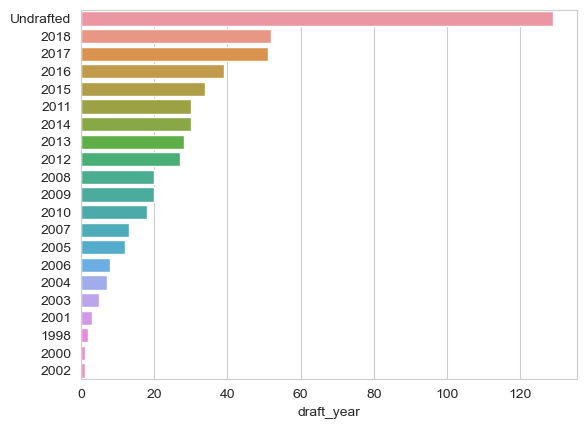

In [12]:
sns.barplot(y=df.loc[df.season=='2018-19'].draft_year.value_counts().index,x=df.loc[df.season=='2018-19'].draft_year.value_counts())

In [13]:
total_player = len(df.loc[df.season=='2018-19'].player_name.unique())
undrafted_player = len(df.loc[(df.season=='2018-19')&(df.draft_year=='Undrafted')].player_name.unique())
prcntg  = 100*(undrafted_player/total_player)
print(prcntg)

24.339622641509433


24% of the nba players are undrafted. we can create dummy variables for each year of undrafted players if we were modelling but we'll leave it as it is as I am only doing expolatory analysis

In [14]:
df.drop(df[df.draft_year<'1995'].index, inplace=True)

we will turn all players undrafted into the 61st pick for analysis purpose instead of creating dummy vairables for each year

In [15]:
df['draft_number'].replace('Undrafted','82',inplace=True)
df['draft_number'].replace('82','61',inplace=True)
df['draft_number'] = pd.to_numeric(df['draft_number'])

In [16]:
df_player = df[['player_name','gp']].groupby('player_name').sum().reset_index()
df_player = df_player.loc[df_player['gp'] < 5]
for p in df_player['player_name']:
    df.drop(df[df.player_name==p].index, inplace=True)

Next, we create two dataframe: average stats per draft pick and average stats per player. Average stats per draft pick means the average stats for each draft pick. For stat, we will used 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'.

In [17]:
stats = ['gp', 'pts', 'reb', 'ast', 'net_rating',
         'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
avg_per_pick = df.groupby(['draft_number'])[stats].mean().reset_index()
avg_per_player = df.groupby(['player_name','draft_number'])[stats].mean().reset_index()

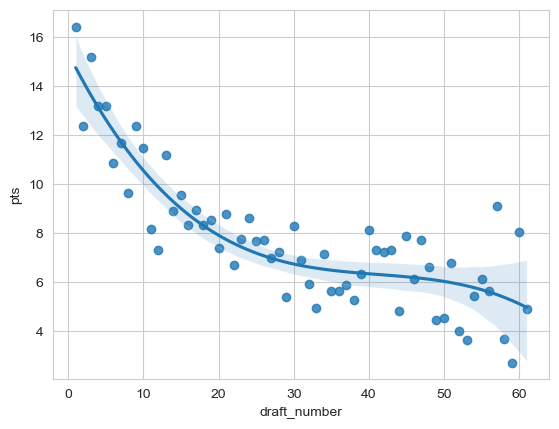

In [18]:
sns.regplot(x='draft_number',y='pts',data=avg_per_pick,order=3)
plt.show()

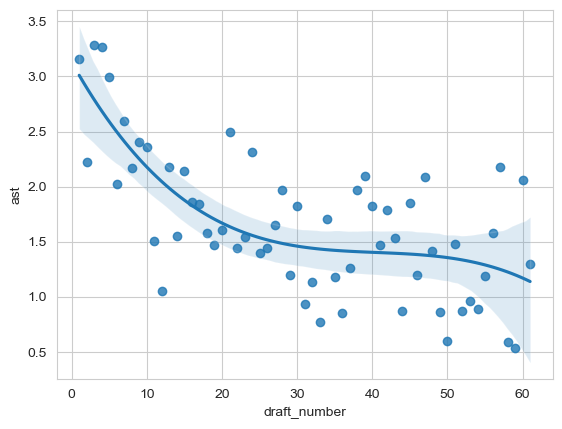

In [19]:
sns.regplot(x='draft_number',y='ast',data=avg_per_pick,order=3)
plt.show()

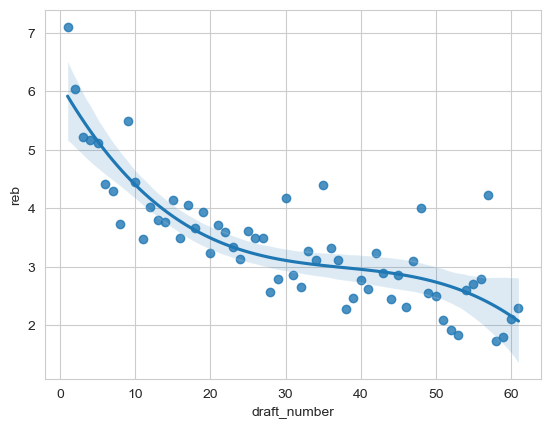

In [20]:
sns.regplot(x='draft_number',y='reb',data=avg_per_pick,order=3)
plt.show()

it seems higher the draft pick higher the rebounds, assists and points, so I am going to check for outliers now

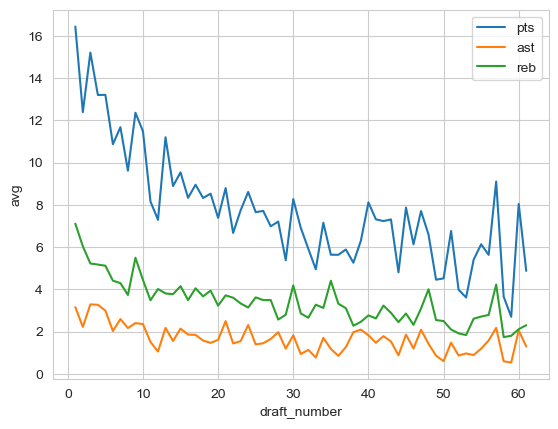

In [21]:
ax = sns.lineplot(x='draft_number',y='pts',data=avg_per_pick, label='pts')
ax = sns.lineplot(x='draft_number',y='ast',data=avg_per_pick, label='ast')
ax = sns.lineplot(x='draft_number',y='reb',data=avg_per_pick, label='reb')
ax.set(ylabel = 'avg')
ax.legend()
plt.show()

In [22]:
avg_per_pick[['draft_number','pts','reb','ast']][:15]

,draft_number,pts,reb,ast
0,1,16.445417,7.110833,3.158333
1,2,12.390541,6.038739,2.219820
2,3,15.210549,5.224051,3.286920
3,4,13.204167,5.173750,3.267917
4,5,13.210040,5.118474,2.990763
5,6,10.873054,4.410180,2.026946
6,7,11.679399,4.293562,2.591416
7,8,9.618932,3.732039,2.166990
8,9,12.362150,5.496262,2.401869
9,10,11.487391,4.445652,2.355217


In [23]:
avg_per_pick[['draft_number','pts','reb','ast']][-5:]

,draft_number,pts,reb,ast
56,57,9.105405,4.227027,2.175676
57,58,3.651724,1.737931,0.593103
58,59,2.700000,1.800000,0.533333
59,60,8.044000,2.112000,2.056000
60,61,4.872002,2.302008,1.294791


In [24]:
avg_per_player[avg_per_player.draft_number==57]

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
317,Corsley Edwards,57,10.000000,2.700000,2.500000,0.300000,-14.600000,0.112000,0.149000,0.166000,0.372000,0.057000
509,Drew Barry,57,20.000000,2.300000,1.100000,1.866667,2.266667,0.014667,0.100000,0.125333,0.570667,0.275000
896,Jordan Bone,57,10.000000,1.200000,0.400000,0.800000,-2.900000,0.000000,0.091000,0.171000,0.300000,0.235000
998,Kevin Hervey,57,7.000000,0.300000,0.300000,0.100000,-13.300000,0.000000,0.100000,0.220000,0.091000,0.100000
1130,Manu Ginobili,57,66.062500,13.150000,3.481250,3.781250,10.225000,0.029312,0.127000,0.236563,0.580875,0.238312
1135,Marcin Gortat,57,67.166667,9.183333,7.458333,1.058333,0.816667,0.105167,0.247917,0.169500,0.566250,0.067167
1501,Ryan Reid,57,5.000000,1.600000,0.400000,0.000000,15.000000,0.071000,0.077000,0.163000,0.800000,0.000000
1667,Torraye Braggs,57,11.000000,1.800000,2.150000,0.250000,-5.750000,0.262500,0.227000,0.183000,0.475500,0.041500


In [25]:
avg_per_player[avg_per_player.draft_number==60]

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
37,Alex Acker,60,15.000000,2.350000,1.000000,0.650000,-21.300000,0.039000,0.115000,0.215500,0.364500,0.140500
321,Cory Jefferson,60,29.000000,3.250000,2.450000,0.150000,-1.700000,0.111500,0.198000,0.191500,0.463000,0.023500
684,Isaiah Thomas,60,58.333333,16.522222,2.266667,4.566667,-1.822222,0.019778,0.069000,0.263778,0.551667,0.264667
1028,Kostas Antetokounmpo,60,2.500000,0.500000,0.400000,0.150000,0.450000,0.000000,0.222000,0.120000,0.105000,0.083500
1450,Robert Sacre,60,47.250000,3.700000,2.850000,0.600000,-6.800000,0.076500,0.147750,0.144250,0.460750,0.066250
1532,Semih Erden,60,34.500000,3.750000,2.750000,0.400000,-6.400000,0.074500,0.183000,0.142500,0.565500,0.051500
1714,Tyrone Wallace,60,35.333333,5.366667,2.233333,1.333333,-2.033333,0.023333,0.108333,0.162333,0.452000,0.109333
1756,Will Blalock,60,14.000000,1.800000,1.100000,1.200000,-6.700000,0.038000,0.066000,0.120000,0.383000,0.193000


Isiah thomas is a outlier due to him being undrafted ad playing like an all star

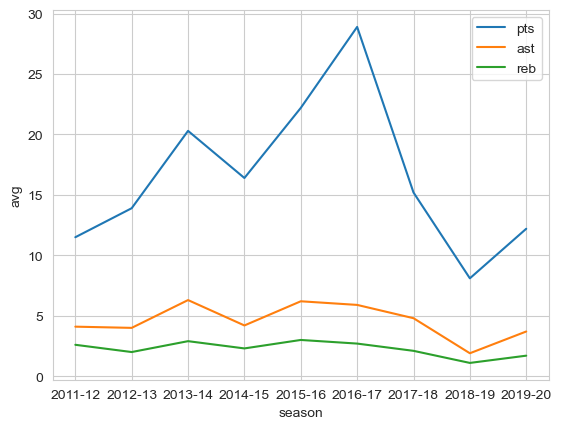

In [26]:
ax = sns.lineplot(x='season',y='pts',data=df.loc[df['player_name'] == 'Isaiah Thomas'], label='pts')
ax = sns.lineplot(x='season',y='ast',data=df.loc[df['player_name'] == 'Isaiah Thomas'], label='ast')
ax = sns.lineplot(x='season',y='reb',data=df.loc[df['player_name'] == 'Isaiah Thomas'], label='reb')
ax.set(ylabel = 'avg')
ax.legend()
plt.show()

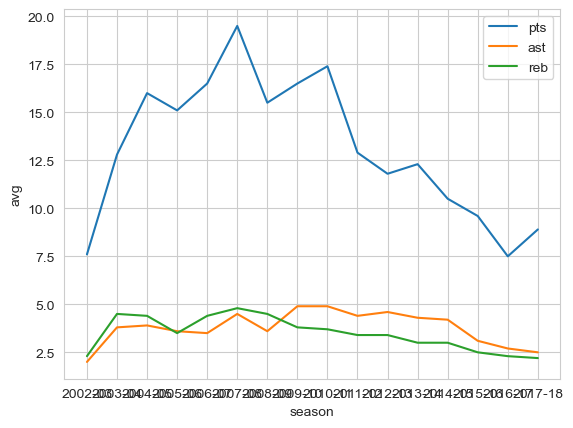

In [27]:
ax = sns.lineplot(x='season',y='pts',data=df.loc[df['player_name'] == 'Manu Ginobili'], label='pts')
ax = sns.lineplot(x='season',y='ast',data=df.loc[df['player_name'] == 'Manu Ginobili'], label='ast')
ax = sns.lineplot(x='season',y='reb',data=df.loc[df['player_name'] == 'Manu Ginobili'], label='reb')
ax.set(ylabel = 'avg')
ax.legend()
plt.show()

## Now i am going to rank the players using a metric for each draft pick

In [28]:
def score(a, b):
    #function to calculate score
    sum = 0.0
    for i in range(1,len(a)):
        sum += (b[i+1]-a[i])
    return (sum)

In [29]:
dist = []
for p in range(avg_per_player.shape[0]):
    val = score(avg_per_pick.loc[avg_per_player.loc[p][1]-1],avg_per_player.loc[p])
    dist.append(val)
avg_per_player['score'] = dist

In [30]:
avg_per_player.loc[avg_per_player.draft_number==1].sort_values('score')


,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
93,Anthony Bennett,1,37.750000,3.975000,2.850000,0.400000,-11.425000,0.076750,0.228750,0.186500,0.465500,0.051250,-55.560771
1168,Markelle Fultz,1,31.666667,9.066667,3.400000,4.033333,1.000000,0.037333,0.098333,0.203667,0.463333,0.258667,-39.891521
634,Greg Oden,1,35.000000,7.633333,5.933333,0.466667,3.000000,0.147333,0.232000,0.184667,0.604333,0.037000,-36.880854
1035,Kwame Brown,1,50.583333,6.166667,5.316667,0.875000,-3.941667,0.094250,0.208000,0.155083,0.511833,0.066000,-30.084354
1788,Zion Williamson,1,18.000000,23.600000,6.800000,2.200000,9.600000,0.096000,0.113000,0.285000,0.623000,0.116000,-28.686521
1226,Michael Olowokandi,1,55.555556,7.744444,6.444444,0.655556,-4.911111,0.082667,0.210000,0.182556,0.453556,0.042444,-23.659410
74,Andrea Bargnani,1,55.000000,14.270000,4.530000,1.230000,-5.720000,0.039200,0.149200,0.243100,0.524200,0.073800,-19.780021
992,Kenyon Martin,1,50.466667,10.726667,6.513333,1.606667,2.906667,0.069667,0.187800,0.183867,0.505533,0.090067,-16.862588
78,Andrew Bogut,1,50.428571,8.600000,8.192857,2.035714,3.071429,0.099500,0.254786,0.158071,0.548571,0.120786,-16.609235
430,Deandre Ayton,1,50.500000,17.650000,11.150000,1.850000,-2.950000,0.112500,0.234500,0.223500,0.589500,0.093500,-10.666021


In [31]:
avg_per_player.loc[avg_per_player.groupby('draft_number')['score'].idxmax()]


,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
1072,LeBron James,1,73.882353,27.064706,7.447059,7.441176,7.205882,0.036176,0.182000,0.312882,0.587471,0.352941,34.393126
996,Kevin Durant,2,70.750000,26.883333,7.075000,4.125000,5.975000,0.022417,0.179750,0.296167,0.614417,0.192417,33.399405
739,James Harden,3,74.909091,25.154545,5.300000,6.263636,6.136364,0.025091,0.138818,0.297000,0.608545,0.306909,29.916734
1491,Russell Westbrook,4,72.666667,23.408333,7.083333,8.225000,5.400000,0.052583,0.160417,0.320750,0.528167,0.398500,33.240575
997,Kevin Garnett,5,69.100000,17.350000,9.830000,3.630000,5.565000,0.071100,0.263900,0.240600,0.540250,0.182000,20.345175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,Manu Ginobili,57,66.062500,13.150000,3.481250,3.781250,10.225000,0.029312,0.127000,0.236563,0.580875,0.238312,23.699198
1445,Robbie Hummel,58,49.000000,3.900000,2.750000,0.500000,-4.800000,0.052000,0.166500,0.123500,0.514000,0.055000,20.148414
336,DJ Strawberry,59,33.000000,2.200000,0.800000,0.900000,-3.200000,0.034000,0.073000,0.189000,0.364000,0.165000,7.551333
684,Isaiah Thomas,60,58.333333,16.522222,2.266667,4.566667,-1.822222,0.019778,0.069000,0.263778,0.551667,0.264667,32.584076


## this shows us the best player drafted acc to their draft pick

In [32]:
avg_per_player.loc[avg_per_player.draft_number== 8].sort_values('score')
## use the number 8 here and enter any pick you want to check the scores for ^^^

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
846,Joe Alexander,8,33.500000,2.600000,1.250000,0.500000,-13.800000,0.068500,0.122500,0.151500,0.383500,0.092500,-50.876296
1554,Shawn Respert,8,36.666667,4.400000,1.300000,0.933333,-5.800000,0.032333,0.088667,0.187000,0.513000,0.137000,-37.286796
425,DeSagana Diop,8,50.083333,1.691667,3.158333,0.458333,-3.841667,0.102833,0.181667,0.102167,0.407417,0.062333,-23.338379
1398,Rafael Araujo,8,46.333333,2.733333,2.766667,0.333333,-0.700000,0.091000,0.218000,0.157667,0.446667,0.045667,-23.319129
168,Brandan Wright,8,42.800000,6.660000,3.500000,0.440000,-0.350000,0.091500,0.153700,0.166500,0.617300,0.047400,-21.618396
901,Jordan Hill,8,51.125000,6.837500,5.250000,0.637500,-2.612500,0.139250,0.207375,0.192125,0.517875,0.055500,-13.395171
582,Frank Ntilikina,8,58.333333,5.866667,2.133333,2.966667,-5.033333,0.016667,0.080000,0.159333,0.448333,0.203000,-10.570796
17,Adonal Foyle,8,61.083333,3.783333,4.475000,0.441667,-4.400000,0.110333,0.189083,0.125250,0.495917,0.041667,-9.399213
1174,Marquese Chriss,8,63.750000,7.600000,4.775000,1.075000,-11.225000,0.066000,0.197750,0.188250,0.523750,0.088000,-8.706046
297,Chris Wilcox,8,57.090909,7.627273,4.663636,0.700000,-3.954545,0.092818,0.195364,0.184091,0.575364,0.060727,-8.509160


lets get to the underacheivers in their respective draft picks

In [33]:
avg_per_player.loc[avg_per_player.groupby('draft_number')['score'].idxmin()][:15]

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
93,Anthony Bennett,1,37.750000,3.975000,2.850000,0.400000,-11.425000,0.076750,0.228750,0.186500,0.465500,0.051250,-55.560771
652,Hasheem Thabeet,2,44.800000,1.920000,2.400000,0.100000,-7.340000,0.096600,0.188400,0.103400,0.565000,0.012400,-39.868295
715,Jahlil Okafor,3,43.600000,10.280000,4.760000,0.960000,-14.200000,0.079600,0.178200,0.226400,0.580000,0.089800,-42.669266
535,Eddy Curry,4,47.909091,9.663636,3.963636,0.363636,-14.618182,0.077182,0.162182,0.237364,0.566455,0.028455,-36.649720
889,Jonathan Bender,5,32.750000,5.225000,2.025000,0.612500,-6.950000,0.041625,0.145125,0.220250,0.536000,0.093500,-51.728675
343,Dajuan Wagner,6,25.750000,6.975000,0.800000,1.550000,-4.800000,0.007250,0.038500,0.243000,0.589250,0.180000,-45.363623
1750,Wendell Carter Jr.,7,42.500000,10.750000,8.350000,1.500000,-5.800000,0.090500,0.207500,0.177000,0.563500,0.090000,-22.636088
846,Joe Alexander,8,33.500000,2.600000,1.250000,0.500000,-13.800000,0.068500,0.122500,0.151500,0.383500,0.092500,-50.876296
1358,Patrick O'Bryant,9,22.500000,1.925000,1.300000,0.300000,-7.175000,0.075000,0.193500,0.181250,0.509250,0.066750,-63.395647
1276,Mouhamed Sene,10,15.666667,2.500000,1.700000,0.033333,-8.966667,0.132000,0.219000,0.210000,0.550333,0.009333,-68.443543


In [34]:
avg_per_player.loc[avg_per_player.draft_number==7].sort_values('score')

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
1750,Wendell Carter Jr.,7,42.500000,10.750000,8.350000,1.500000,-5.800000,0.090500,0.207500,0.177000,0.563500,0.090000,-22.636088
288,Chris Mihm,7,54.500000,6.637500,4.750000,0.537500,-5.375000,0.119875,0.183500,0.196500,0.483625,0.061250,-18.969838
532,Eddie Griffin,7,60.600000,6.180000,5.140000,0.700000,-9.060000,0.085800,0.210400,0.178600,0.419400,0.063000,-16.547388
258,Charlie Villanueva,7,59.636364,9.590909,4.300000,0.763636,-7.272727,0.057636,0.202909,0.240000,0.510818,0.067000,-12.968043
937,Julius Randle,7,62.000000,13.883333,7.533333,2.366667,-17.833333,0.061500,0.200667,0.231833,0.503500,0.130333,-11.986755
138,Ben McLemore,7,61.428571,8.300000,2.242857,0.957143,-3.428571,0.021000,0.091429,0.176571,0.541714,0.064000,-10.669874
1088,Lorenzen Wright,7,59.846154,7.253846,5.946154,0.730769,-3.769231,0.099154,0.200538,0.165615,0.468846,0.053923,-10.068819
548,Emmanuel Mudiay,7,58.800000,10.900000,2.940000,3.740000,-5.640000,0.020200,0.107400,0.234000,0.495000,0.243200,-9.224788
1296,Nene,7,56.764706,10.129412,5.511765,1.617647,-1.282353,0.073294,0.175941,0.212235,0.540706,0.103765,-7.217470
146,Bismack Biyombo,7,70.444444,5.200000,6.166667,0.533333,-7.133333,0.104778,0.225556,0.126778,0.554778,0.043778,-4.797810
